# CSCI 3220: Python for Data Science and AI

## Assignment 4

## Due Date: May 5(Wednesday), 11:59 PM

## Total Points: 36

## Bonus Points: 4

#### ***Write the code in Jupyter notebook (ipynb file) with proper comments. 
#### ***Add proper citation if you take help from a different source (not from the textbook).
#### ***Rename the file with your student ID and submit it in Moodle.

In [259]:
import numpy as np
import pandas as pd

# Question 1
Design and implement a basic neural network using Keras Library for the MNIST digits classification dataset (Keras Toy Dataset).

### A. Split the dataset into train and test sets

In [263]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

### B. The input layer will take the pixel values (one-dimensional array) as input. The network will have three hidden layers with an arbitrary number of nodes in each layer.


In [264]:
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

from tensorflow import keras
from tensorflow.keras import layers

#Convert images to 1D array.
inputTrainPixels = X_train.reshape(60000, 784).astype('float32') / 255
inputTestPixels = X_test.reshape(10000, 784).astype('float32') / 255
outputTrainResults = to_categorical(y_train)
outputTestResults = to_categorical(y_test)

model = Sequential()
model.add(Dense(784, activation='relu'))
model.add(Dense(254, activation='relu'))
model.add(Dense(254, activation='relu'))
model.add(Dense(254, activation='relu'))
model.add(Dense(10, activation='softmax'))

#Citation: learned how to fix shapes incompatibility ValueError by using 'sparse_categorical_crossentropy' from Stack Overflow
#Link: https://stackoverflow.com/questions/62148508/how-can-i-overcome-valueerror-shapes-none-1-and-none-7-are-incompatible
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### C. Print the model summary and plot your designed model architecture. 

In [244]:
#NOTE: Cell 1D (next cell) must be ran first prior to running this cell.
#I kept this cell here for assignment-order purposes.

print(model.summary())

Model: "sequential_155"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_503 (Dense)            (32, 784)                 615440    
_________________________________________________________________
dense_504 (Dense)            (32, 254)                 199390    
_________________________________________________________________
dense_505 (Dense)            (32, 254)                 64770     
_________________________________________________________________
dense_506 (Dense)            (32, 254)                 64770     
_________________________________________________________________
dense_507 (Dense)            (32, 10)                  2550      
Total params: 946,920
Trainable params: 946,920
Non-trainable params: 0
_________________________________________________________________
None


### D. Use 20% of your training data as a validation set, and the rest of the data should be used to train your model. Plot the loss and accuracy for each epoch in the training and validation set.

In [265]:
history = model.fit(inputTrainPixels, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3814 - accuracy: 0.8793 - val_loss: 0.1351 - val_accuracy: 0.9621
Epoch 2/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1066 - accuracy: 0.9684 - val_loss: 0.1035 - val_accuracy: 0.9710
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0702 - accuracy: 0.9787 - val_loss: 0.1233 - val_accuracy: 0.9686
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0559 - accuracy: 0.9836 - val_loss: 0.1160 - val_accuracy: 0.9692
Epoch 5/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0427 - accuracy: 0.9874 - val_loss: 0.1036 - val_accuracy: 0.9718
Epoch 6/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0388 - accuracy: 0.9895 - val_loss: 0.1068 - val_accuracy: 0.9780
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0321 - accuracy: 0.9907 - val_loss: 0.0975 - val_accuracy:

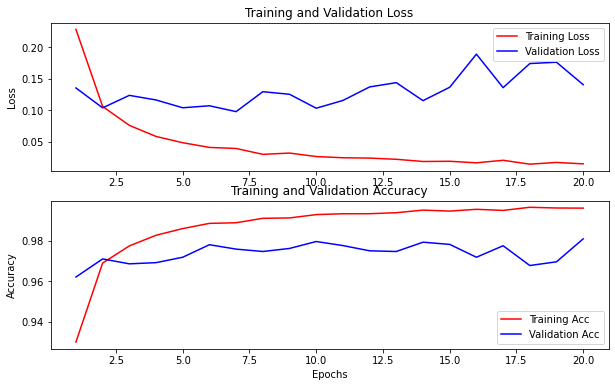

In [266]:
#Citation: Used direct plotting code from the ML_Keras_Demo since it works fine, and is part of the class and/or book.
import matplotlib.pyplot as plt

history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'r', label='Training Loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

### E. Based on the plot (question 1d), tune the hyperparameters of the network so that it does not overfit. You should use EarlyStopping (avoid overfitting) and ModelCheckpoint to save the best model based on the performance of the validation set.

In [268]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)
mc = ModelCheckpoint('model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history = model.fit(inputTrainPixels, y_train, epochs=15, validation_split=0.2, callbacks=[es,mc])

Epoch 1/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0153 - accuracy: 0.9966 - val_loss: 0.1535 - val_accuracy: 0.9788

Epoch 00001: val_accuracy improved from -inf to 0.97883, saving model to model.h5
Epoch 2/15
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0153 - accuracy: 0.9961 - val_loss: 0.1607 - val_accuracy: 0.9781

Epoch 00002: val_accuracy did not improve from 0.97883
Epoch 3/15
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0097 - accuracy: 0.9977 - val_loss: 0.2176 - val_accuracy: 0.9779

Epoch 00003: val_accuracy did not improve from 0.97883
Epoch 00003: early stopping


### F. Load the best-saved model and evaluate your model's performance in terms of accuracy for the test set.


In [275]:
from keras.models import load_model

#Citation: learned how to load saved model from TensorFlow documentation
#Link: https://www.tensorflow.org/guide/keras/save_and_serialize

loadedModel = load_model("model.h5")

loadedModel.evaluate(inputTestPixels, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1340 - accuracy: 0.9793


[0.13397052884101868, 0.9793330430984497]

# Question 2
Design and implement a convolutional neural network (CNN) using Keras Library for the CIFAR10 small images classification dataset (Keras Toy Dataset).